In [8]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer, TfidfTransformer
from sklearn.datasets import load_files
from pythainlp.corpus import thai_stopwords
import pandas as pd
import numpy as np
from function import str_to_list
import re

In [2]:
df = pd.read_csv('csv/new_data.csv')
size = df.shape[0]


Data Preparation

In [3]:
def text_process(text):
    text = re.sub("\[|\]|'|,"," ",text)
    return text
    
df['text_replace'] = df['text'].apply(text_process)
df

,post_type,text,text_replace
0,3,"['หา', 'สัญญา', 'หอ', 'มจพ', 'ย้าย', 'ปลาย', '...",หา สัญญา หอ มจพ ย้าย ปลาย ...
1,1,"['ขาย', 'ตั๋วหนัง', 'black', 'panther', 'โรง',...",ขาย ตั๋วหนัง black panther โรง ...
2,1,"['อนุญาต', 'ขาย', 'ขาย', 'ตู้', 'เย็น', 'Midea...",อนุญาต ขาย ขาย ตู้ เย็น Midea...
3,1,"['XX', 'คน', 'เช่า', 'XX', 'อนุญาต', 'ประกาศ',...",XX คน เช่า XX อนุญาต ประกาศ ...
4,1,"['ขาย', 'สัญญา', 'หอ', 'หมู่บ้าน', 'สิ', 'ริน'...",ขาย สัญญา หอ หมู่บ้าน สิ ริน ...
...,...,...,...
1403,1,"['ขาย', 'สัญญา', 'S9', 'Residence', 'ชั้น', '9...",ขาย สัญญา S9 Residence ชั้น 9...
1404,3,"['แนว', 'ข้อ', 'สอบ', 'รอบ', 'สอบตรง', 'สำหรับ...",แนว ข้อ สอบ รอบ สอบตรง สำหรับ...
1405,0,"['คน', 'ลืม', 'ศาลยีราฟ', 'ฝาก', 'ร้าน', 'ถ่าย...",คน ลืม ศาลยีราฟ ฝาก ร้าน ถ่าย...
1406,3,"['พี่', 'คน', 'รอบ', '2', 'สอบ', 'ข้อ', 'แนะนำ...",พี่ คน รอบ 2 สอบ ข้อ แนะนำ...


In [34]:
from wordcloud import WordCloud, STOPWORDS
th_stop_origin = tuple(thai_stopwords())

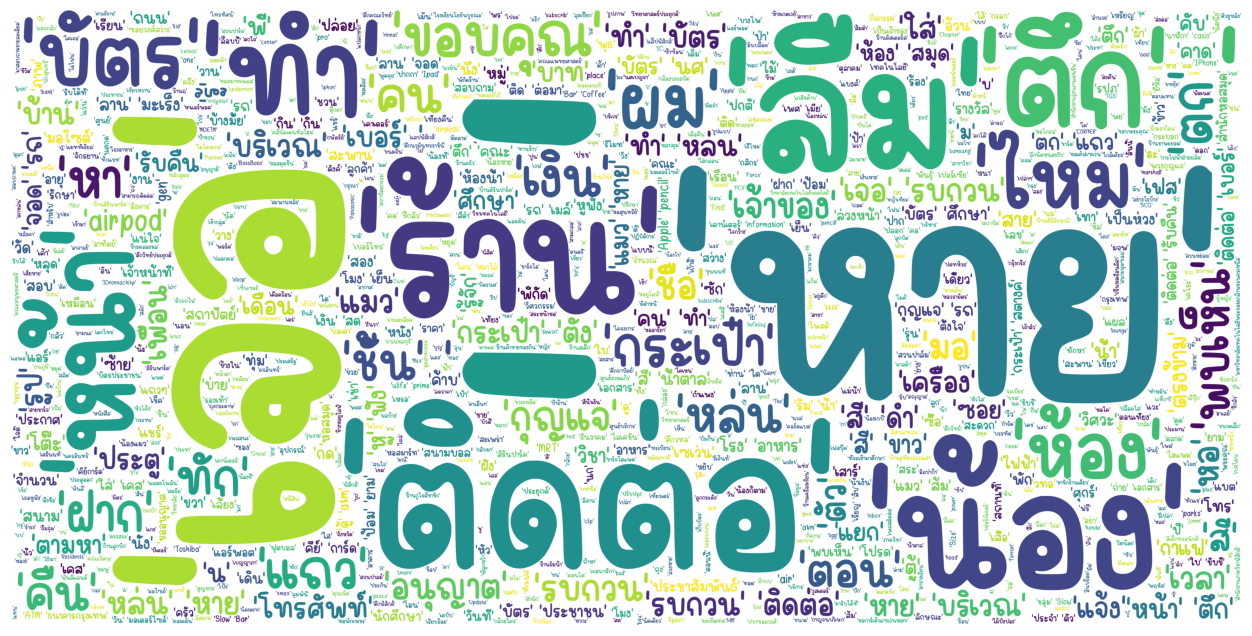

In [36]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
df_pos = df[df['post_type'] == 0]
pos_word_all = " ".join(text for text in df_pos['text'])
reg = r"[ก-๙a-zA-Z']+"
fp = 'content\Ethan.ttf'
wordcloud = WordCloud(stopwords=th_stop_origin, background_color = 'white', max_words=2000, height = 2000, width=4000, font_path=fp, regexp=reg).generate(pos_word_all)
plt.figure(figsize = (16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

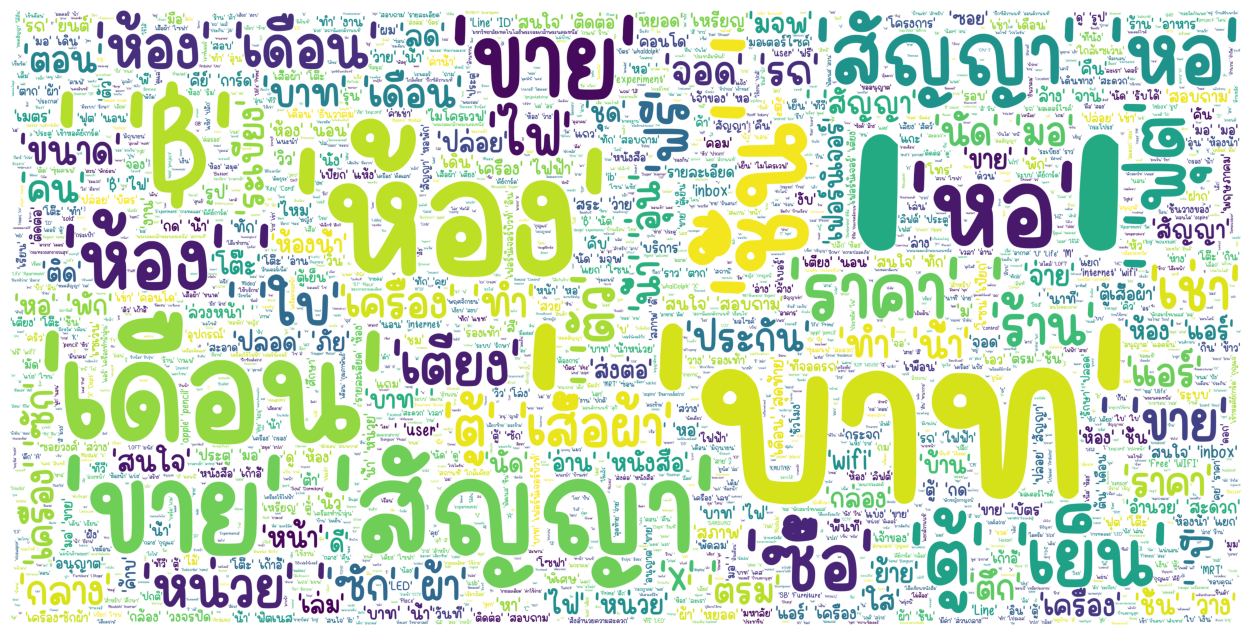

In [37]:
df_pos = df[df['post_type'] == 1]
pos_word_all = " ".join(text for text in df_pos['text'])
reg = r"[ก-๙a-zA-Z']+"
fp = 'content\Ethan.ttf'
wordcloud = WordCloud(stopwords=th_stop_origin, background_color = 'white', max_words=2000, height = 2000, width=4000, font_path=fp, regexp=reg).generate(pos_word_all)
plt.figure(figsize = (16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

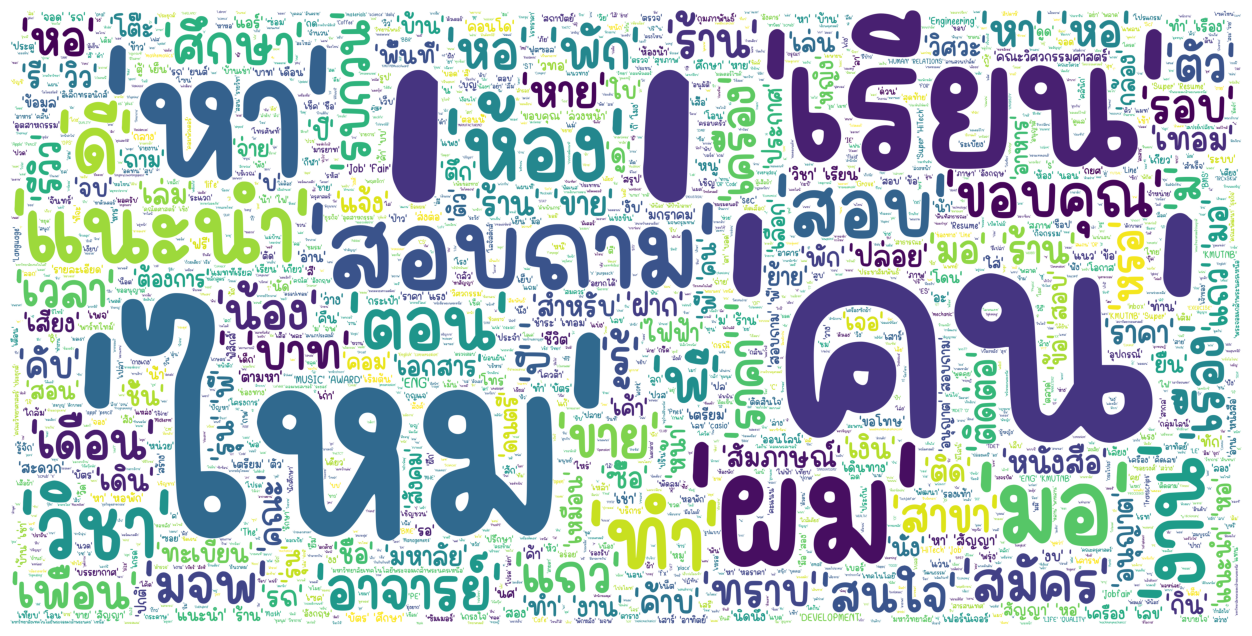

In [38]:
df_pos = df[df['post_type'] == 3]
pos_word_all = " ".join(text for text in df_pos['text'])
reg = r"[ก-๙a-zA-Z']+"
fp = 'content\Ethan.ttf'
wordcloud = WordCloud(stopwords=th_stop_origin, background_color = 'white', max_words=2000, height = 2000, width=4000, font_path=fp, regexp=reg).generate(pos_word_all)
plt.figure(figsize = (16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [4]:
X = df['text_replace']
y = df["post_type"]

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=0)

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=30,decode_error="ignore")
X_train_vectorized = vectorizer.fit_transform(X_train)

Built model

In [14]:
from sklearn.naive_bayes import MultinomialNB
cls = MultinomialNB(alpha=1.0, fit_prior=True)
# transform the list of text to tf-idf before passing it to the model
cls.fit(vectorizer.fit_transform(X_train), y_train)
 
from sklearn.metrics import classification_report, accuracy_score
 
y_pred = cls.predict(vectorizer.fit_transform(X_test))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.5568181818181818
              precision    recall  f1-score   support

           0       0.44      0.25      0.31        57
           1       0.54      0.33      0.41       125
           3       0.58      0.83      0.68       170

    accuracy                           0.56       352
   macro avg       0.52      0.47      0.47       352
weighted avg       0.54      0.56      0.52       352



In [15]:
import pickle

filename = "./model/check_type.sav"
filenamevec = "./model/vectorizer.sav"

#save model
pickle.dump(cls,open(filename,"wb"))
pickle.dump(vectorizer,open(filenamevec,"wb"))
